<a href="https://colab.research.google.com/github/Amit-Baviskar/Prodigy-InfoTech-Internship-Project-P-/blob/main/Prodigy_DA_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Tree Classifier to Predict Customer Purchase Behavior**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## **Problem Statement**
   The task is to develop a Decision Tree Classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. The dataset used for this problem is the Bank Marketing dataset from the UCI Machine Learning Repository. This dataset contains information on customer characteristics such as age, job, marital status, education, and behavioral data like contact communication type, campaign outcome, and whether the customer subscribes to a term deposit (i.e., makes a purchase). The goal is to build a predictive model that can accurately forecast whether a customer will make a purchase based on these features, providing valuable insights for targeted marketing strategies.

## **Introduction**

In today's competitive market, businesses rely on data-driven insights to optimize their marketing strategies and improve customer engagement. One of the most common challenges faced by companies is predicting customer behavior, such as whether a customer will purchase a product or service. By leveraging machine learning techniques, businesses can build predictive models that help target the right customers with tailored marketing campaigns.

In this context, we aim to develop a **Decision Tree Classifier** to predict customer purchase behavior using the **Bank Marketing dataset** from the UCI Machine Learning Repository. This dataset contains various features, including demographic information (age, job, marital status, education) and behavioral data (contact communication type, campaign outcome). The objective is to analyze these attributes and build a model that accurately predicts whether a customer will subscribe to a product (term deposit). The decision tree model is particularly suited for this task due to its interpretability and ability to handle both numerical and categorical data. This model will provide valuable insights to improve marketing strategies and enhance customer acquisition.

### **Input Variables**


The **Bank Marketing dataset** includes various demographic, financial, and campaign-related features that are used to predict whether a customer will subscribe to a term deposit. Below is a summary of the input variables:

| Field          | Description                                           | Unit                | Type     |
| -------------- | ----------------------------------------------------- | ------------------- | -------- |
| **age**        | Age of the client                                     | Years               | numeric |
| **job**        | Type of job held by the client                        | N/A (categorical)   | object  |
| **marital**    | Marital status of the client                          | N/A (categorical)   | object  |
| **education**  | Educational level of the client                       | N/A (categorical)   | object  |
| **default**    | Whether the client has credit in default              | Yes/No              | binary  |
| **balance**    | Average yearly balance in euros                       | Euros               | numeric |
| **housing**    | Whether the client has a housing loan                 | Yes/No              | binary  |
| **loan**       | Whether the client has a personal loan                | Yes/No              | binary  |
| **contact**    | Type of communication used for the last contact      | N/A (categorical)   | object  |
| **day**        | Day of the last contact in the month                  | Day of the month    | numeric |
| **month**      | Month of the last contact                             | N/A (categorical)   | object  |
| **duration**   | Duration of the last contact in seconds               | Seconds             | numeric |
| **campaign**   | Number of contacts made during the current campaign   | Count               | numeric |
| **pdays**      | Number of days since the last contact from a previous campaign | Days | numeric |
| **previous**   | Number of contacts made prior to the current campaign| Count               | numeric |
| **poutcome**   | Outcome of the previous marketing campaign            | N/A (categorical)   | object  |



#### Description of Categorical Fields:
- **job**: Occupation of the client (e.g., "admin.", "unemployed", "student", etc.).
- **marital**: Marital status (e.g., "married", "divorced", "single").
- **education**: Highest level of education (e.g., "primary", "secondary", "tertiary").
- **contact**: Type of contact used in the last marketing campaign (e.g., "telephone", "cellular").
- **month**: Month of the last contact (e.g., "jan", "feb", "mar", etc.).
- **poutcome**: Outcome of the previous marketing campaign (e.g., "unknown", "success", "failure").

These input variables will be used to predict whether the client subscribed to a term deposit (the target variable **y**).
The goal of this dataset is to predict the value of **y** (whether the client subscribes to a term deposit) based on the input features provided. A Decision Tree Classifier will be built using these features to create a model that can predict customer behavior effectively.



The original source of the data is https://archive.ics.uci.edu/dataset/222/bank+marketing

## Purpose

The purpose of this project is to develop a **Decision Tree Classifier** that can accurately predict whether a customer will subscribe to a term deposit based on their demographic, financial, and campaign-related data. By analyzing customer attributes such as age, job type, education, loan status, and recent campaign interactions, the model aims to uncover patterns that influence purchase decisions. The primary objectives of this task are:

1. **Predict Customer Behavior**: To predict whether a customer will respond positively to a marketing campaign and subscribe to a term deposit.
2. **Understand Key Influencers**: To identify the key factors (e.g., age, job type, contact communication, previous outcomes) that drive customer decisions, helping businesses optimize their marketing strategies.
3. **Support Data-Driven Decisions**: To provide businesses with a reliable tool for targeting the right customers, thereby improving customer acquisition efforts and resource allocation in marketing campaigns.
4. **Enhance Marketing Effectiveness**: By predicting customer responses, the model can help in personalizing offers and strategies, improving customer engagement, and ultimately increasing sales conversion rates.

Overall, the project aims to leverage machine learning to offer actionable insights that can enhance business decision-making and increase marketing ROI.

>## **Import the required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly import tools
import plotly.figure_factory as ff
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix


## **Importing Data Set**

Load Data

In [ ]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/bank-full.csv")

# Display first few rows
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# Rename the column 'y' to 'deposit'
df.rename(columns={'y': 'deposit'}, inplace=True)

# Verify the column name has been changed
print(df.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


## **Data Cleaning :**

In [ ]:
# Assuming your DataFrame is named 'df' and the column is 'pdays'
# Replace 'your_file.csv' with the actual path to your CSV file if needed.
# df = pd.read_csv('your_file.csv')

# Check for negative values in 'col1'
negative_values = df[df['pdays'] < 0]

if not negative_values.empty:
  print("Negative values found in 'pdays':")
  print(negative_values.head())
else:
  print("No negative values found in 'pdays'.")

Negative values found in 'pdays':
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  \
0  unknown    5   may       261         1     -1         0  unknown      no   
1  unknown    5   may       151         1     -1         0  unknown      no   
2  unknown    5   may        76         1     -1         0  unknown      no   
3  unknown    5   may        92         1     -1         0  unknown      no   
4  unknown    5   may       198         1     -1         0  unknown      no   

   marital/education  
0   married/tertiary  


# **Exploratory Data Analysis**

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
# Numerical Columns List
numerical_column=df.select_dtypes(include=['int64','float64']).columns
numerical_column

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [ ]:
# Categorical Columns List
categorical_column=df.select_dtypes(exclude=['int64','float64']).columns
categorical_column_1=categorical_column[1:9]
categorical_column_1

Index(['marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [ ]:
col1=df.columns
col1

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit', 'marital/education'],
      dtype='object')

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
# Remove rows where 'pdays' is negative
no_pdays = df[df['pdays'] >= 0]
no_pdays

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,marital/education
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no,married/tertiary
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes,single/secondary
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes,married/secondary
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no,married/tertiary
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes,married/tertiary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no,single/secondary
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes,married/tertiary
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes,married/secondary
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,married/secondary


In [ ]:
# Remove rows where 'pdays' is negative
new_df = no_pdays[no_pdays['balance'] >= 0]
new_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,marital/education
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no,married/tertiary
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes,married/secondary
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no,married/tertiary
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes,married/tertiary
24080,56,technician,married,secondary,no,589,yes,no,unknown,23,oct,518,1,147,2,success,yes,married/secondary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no,single/secondary
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes,married/tertiary
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes,married/secondary
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,married/secondary


In [ ]:
 # Selecting features and target
features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing','loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays','previous', 'poutcome']
target = 'deposit'
X = new_df[features]
y = new_df[target]



In [ ]:
new_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,7769.000000,7769.000000,7769.000000,7769.000000,7769.000000,7769.000000,7769.000000
mean,41.038872,1672.928820,14.339040,260.901660,2.044665,221.143905,3.179946
std,11.573469,3118.246767,7.958318,235.549689,1.553189,115.719654,4.625057
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,33.000000,230.000000,7.000000,113.000000,1.000000,126.000000,1.000000
50%,38.000000,680.000000,14.000000,195.000000,2.000000,189.000000,2.000000
75%,48.000000,1854.000000,20.000000,324.000000,2.000000,322.000000,4.000000
max,93.000000,81204.000000,31.000000,2219.000000,16.000000,871.000000,275.000000


In [ ]:
new_df_1 = new_df[new_df['poutcome'] != 'unknown']
y_1=pd.DataFrame(new_df_1['deposit'].map({'yes': 1, 'no': 0}))
new_df_1.head()
y_1.astype(int)


,deposit
24060,0
24064,1
24072,0
24077,1
24080,1
...,...
45199,0
45201,1
45204,1
45208,1


# **Demographic And Behavioral Pattern Of Customer**

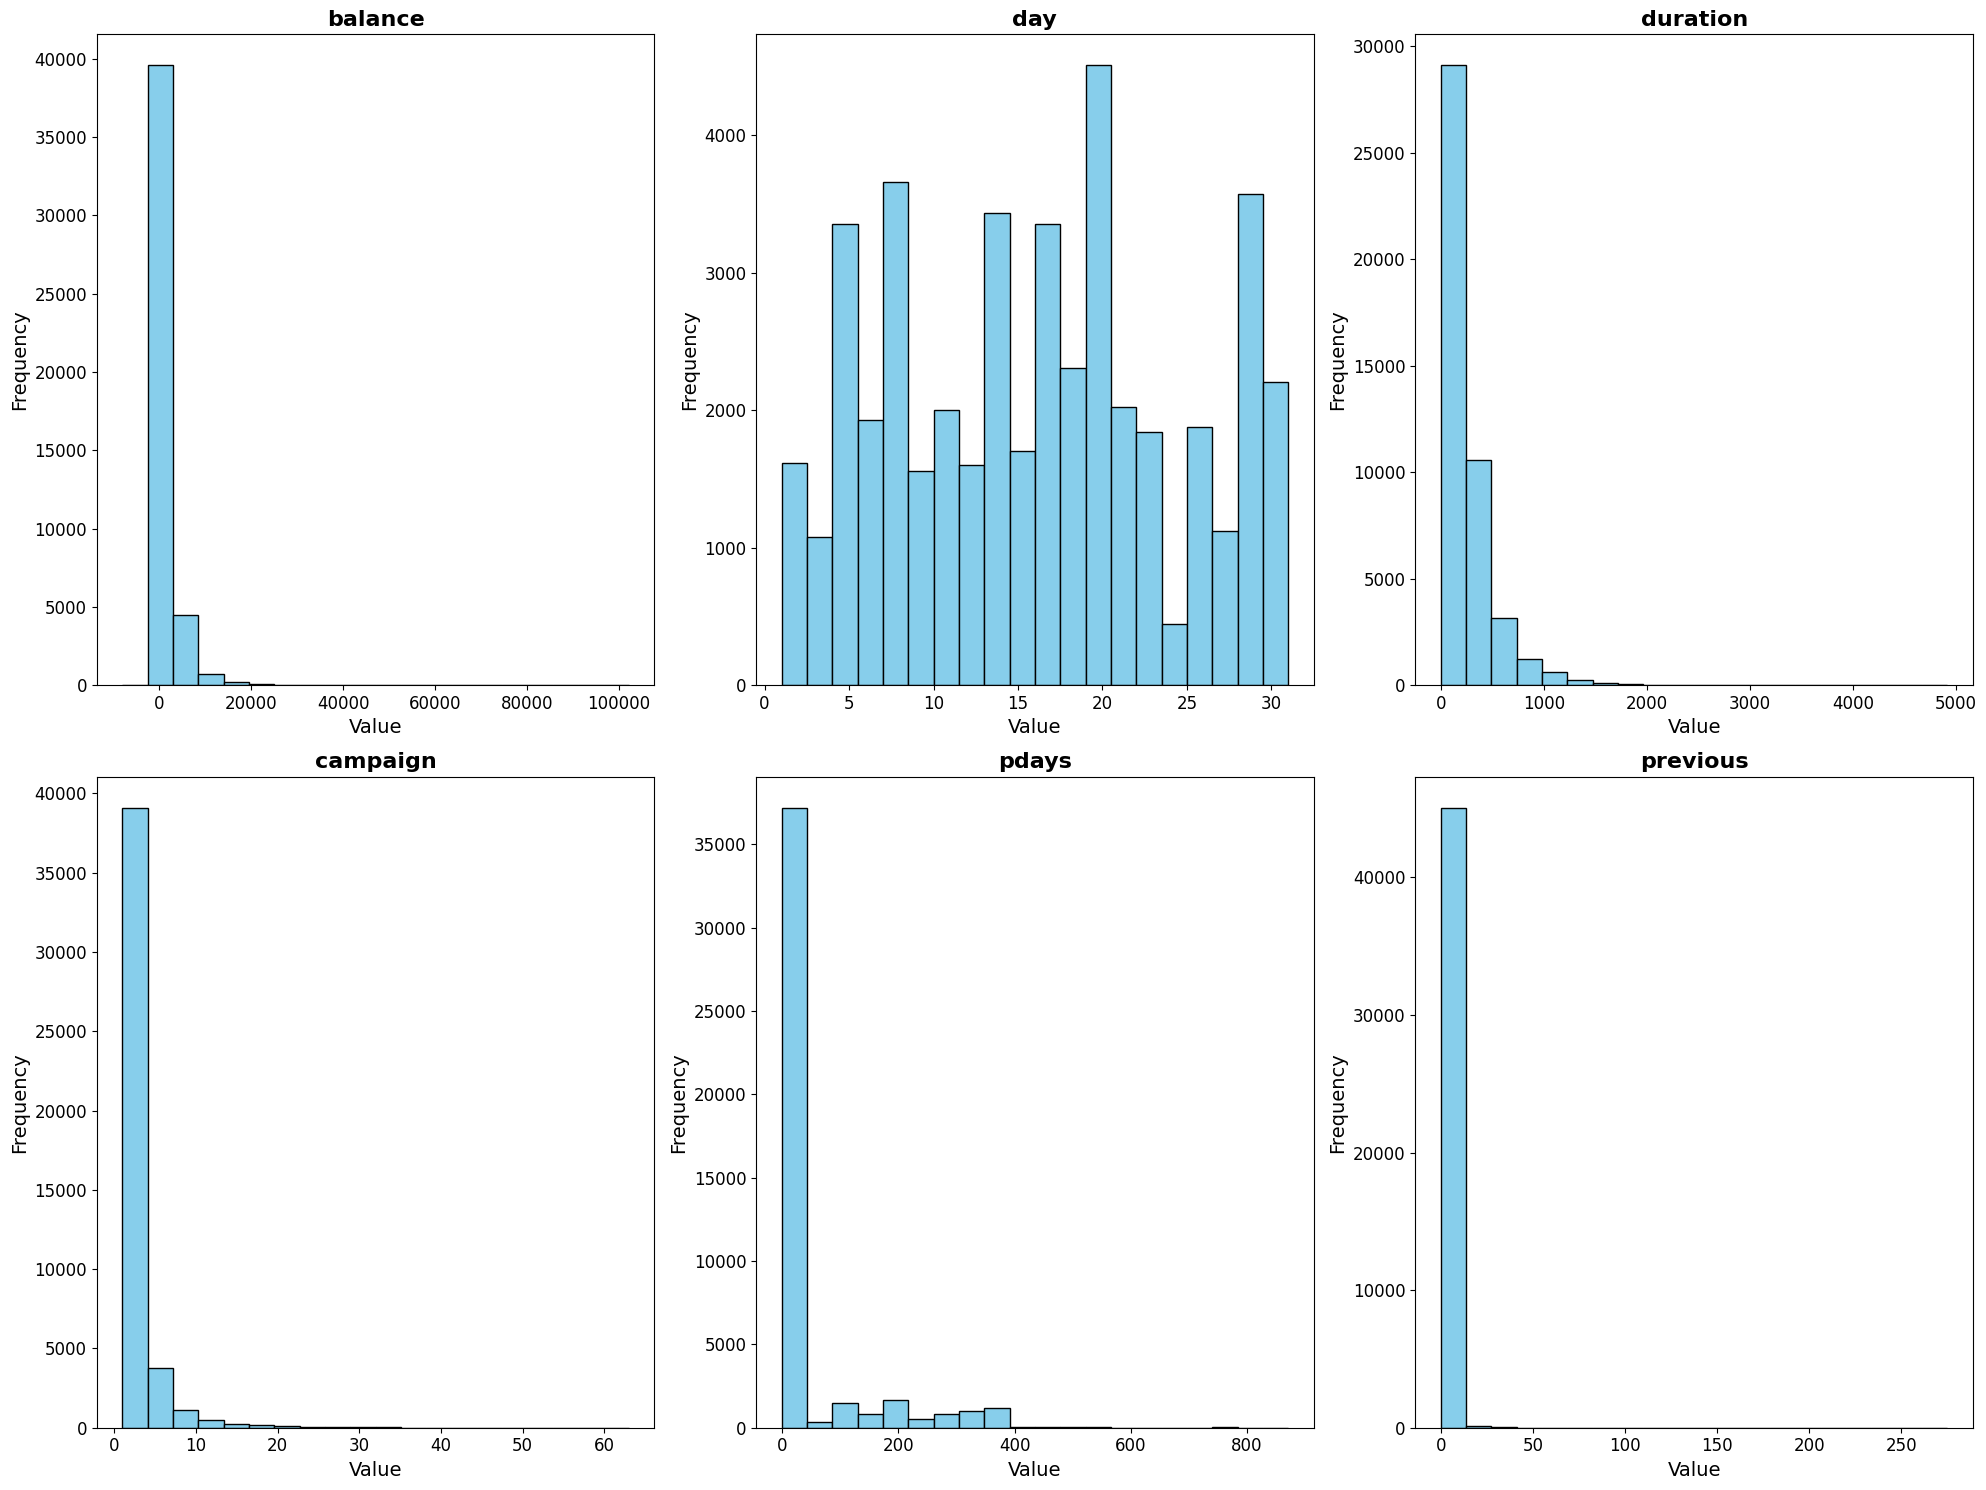

In [ ]:
import matplotlib.pyplot as plt

# List of numeric columns
num_columns = ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Create a 2x3 grid for subplots with shared axes
fig, axs = plt.subplots(2, 3, figsize=(20, 15))  # Adjust the size of the figure

# Counter to keep track of the subplot position
counter = 0

# Loop through each numeric column
for num_column in num_columns:

    # Determine the subplot position
    trace_x = counter // 3  # Row index
    trace_y = counter % 3   # Column index

    # Plot histogram with edge color for better contrast
    axs[trace_x, trace_y].hist(df[num_column], bins=20, color='skyblue', edgecolor='black')

    # Set the title for the subplot (bold font)
    axs[trace_x, trace_y].set_title(num_column, fontsize=16, fontweight='bold')

    # Set x and y axis labels
    axs[trace_x, trace_y].set_xlabel('Value', fontsize=14)
    axs[trace_x, trace_y].set_ylabel('Frequency', fontsize=14)

    # Adjust tick labels font size
    axs[trace_x, trace_y].tick_params(axis='x', labelsize=12)
    axs[trace_x, trace_y].tick_params(axis='y', labelsize=12)

    # Increment the counter to move to the next subplot
    counter += 1

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-215-22db5903d93e>:19: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

<ipython-input-215-22db5903d93e>:19: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

<ipython-input-215-22db5903d93e>:19: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

<ipython-input-215-22db5903d93e>:19: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.ge

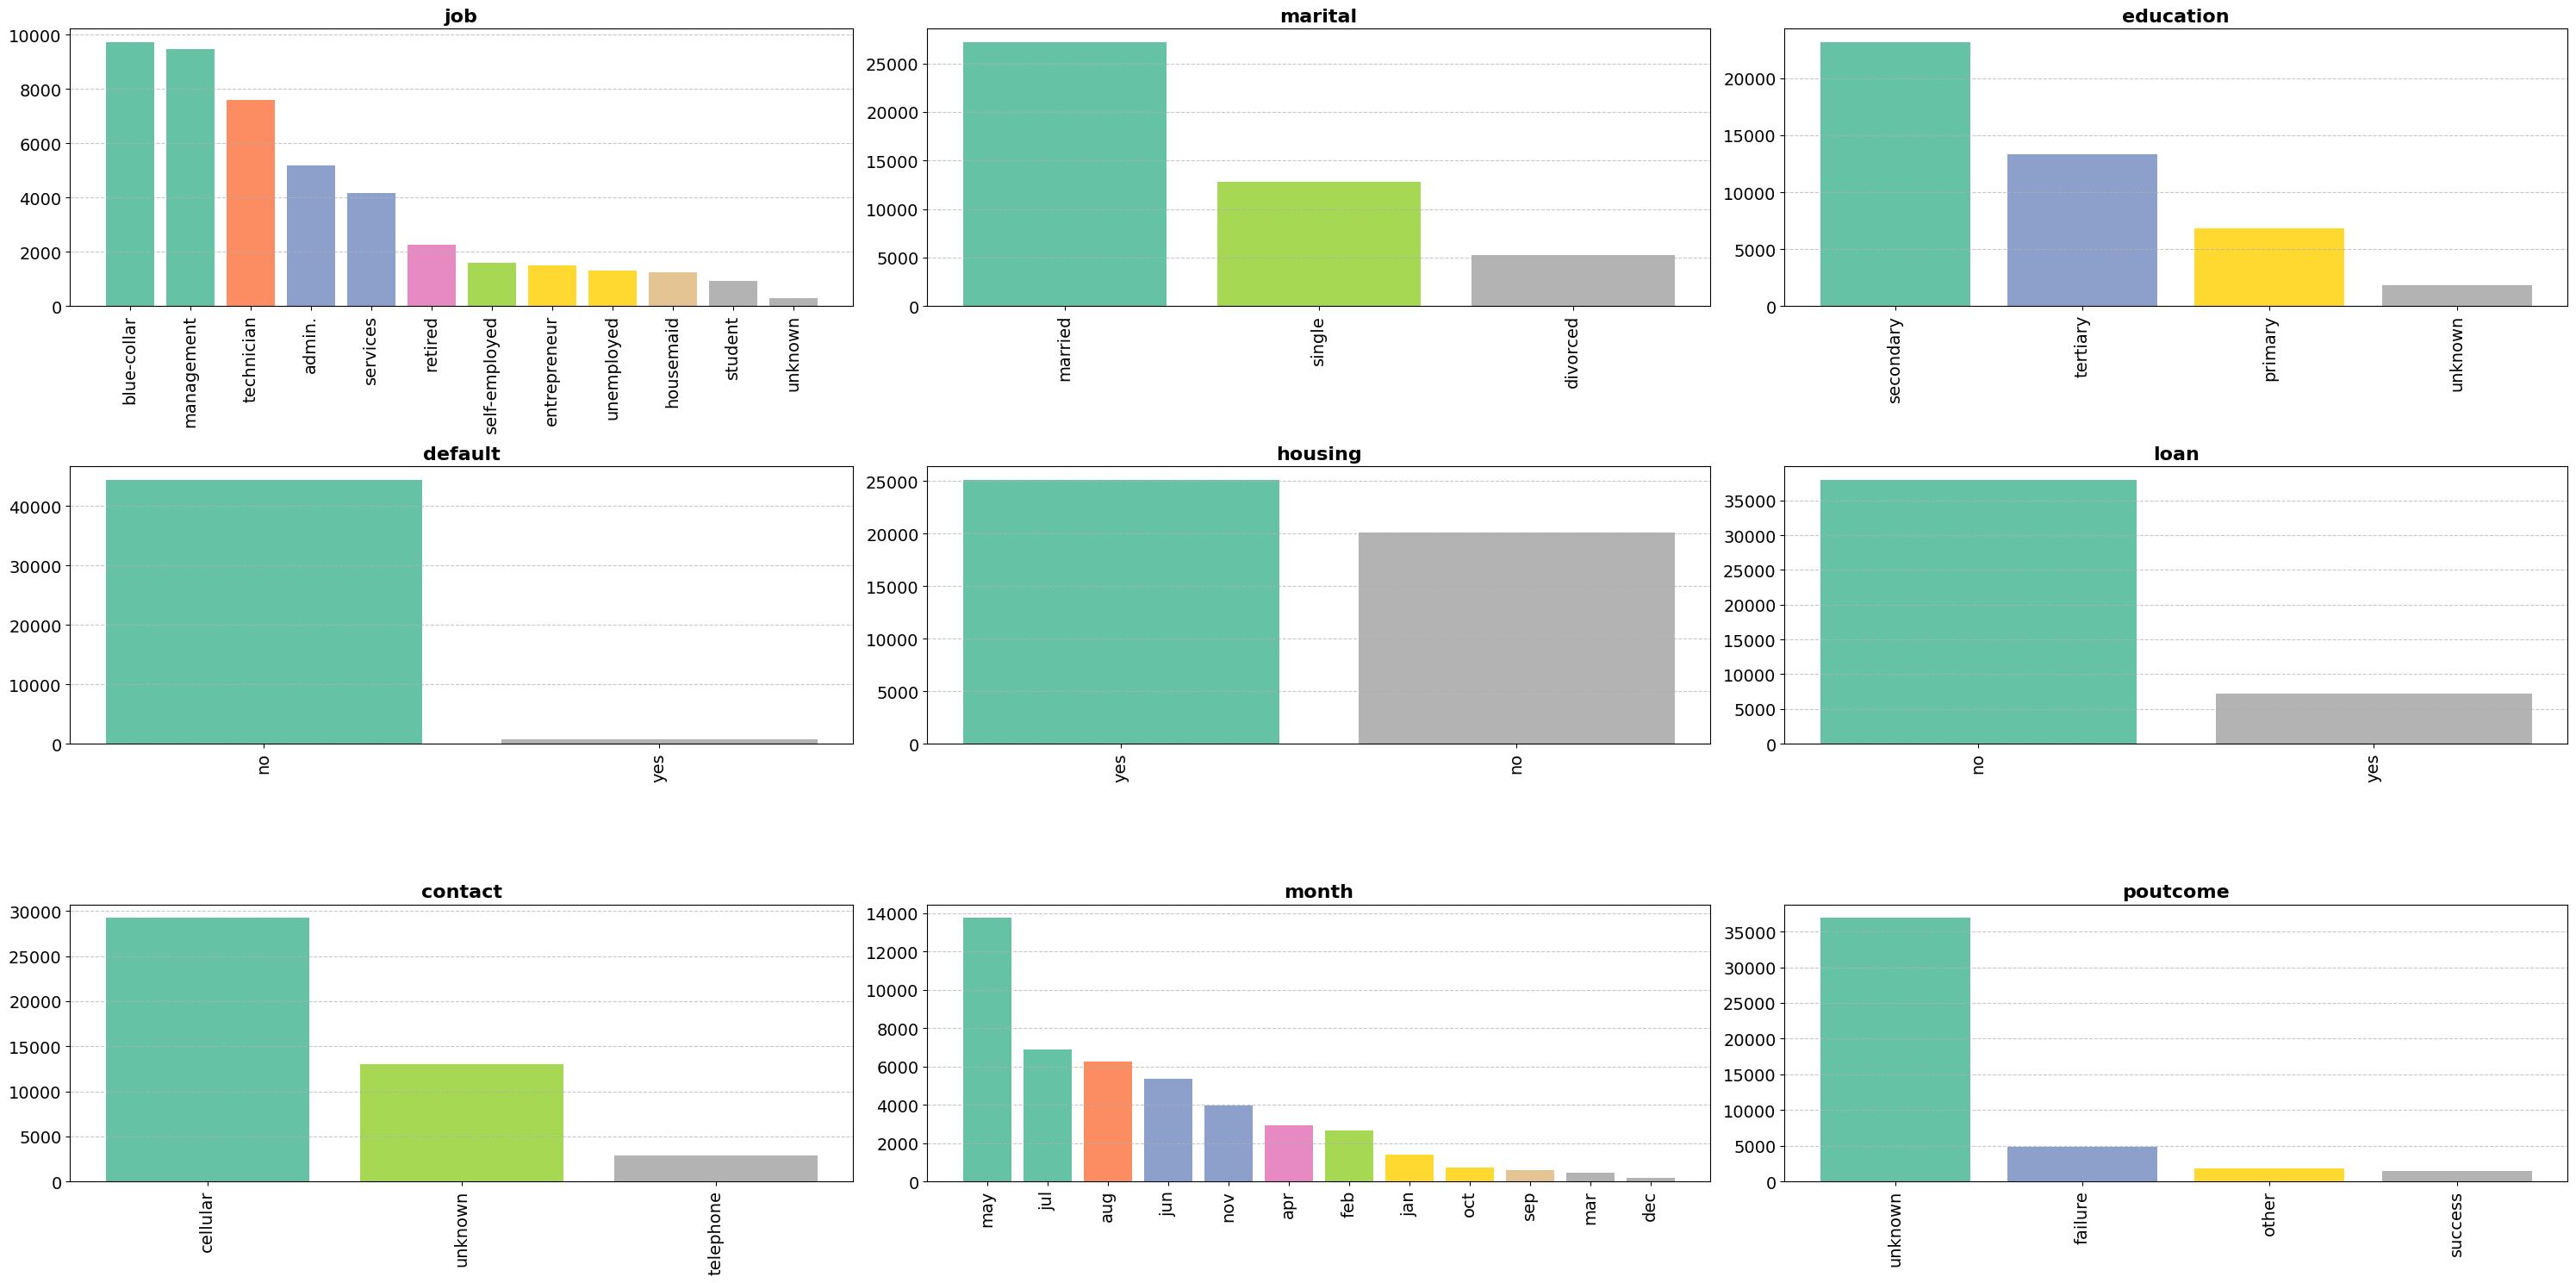

In [ ]:

# List of categorical columns
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Create a 3x3 grid for subplots with shared axes
fig, axs = plt.subplots(3, 3, figsize=(30, 15))  # Adjust the size of the figure

# Counter to keep track of the position in the grid
counter = 0

# Loop through each categorical column
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()

    # Determine the subplot position based on the counter
    trace_x = counter // 3  # Row index
    trace_y = counter % 3   # Column index

    # Define custom color palette for variety
    colors = plt.cm.get_cmap('Set2', len(value_counts))  # Set2 is a nice color palette

    # Plot the bar chart with a custom color palette
    x_pos = np.arange(len(value_counts))
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label=value_counts.index, color=colors.colors)

    # Set the title for the subplot with bold formatting
    axs[trace_x, trace_y].set_title(cat_column, fontsize=16, fontweight='bold')

    # Rotate x-axis labels for better readability
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)

    # Increase the font size for the labels
    axs[trace_x, trace_y].tick_params(axis='x', labelsize=14)
    axs[trace_x, trace_y].tick_params(axis='y', labelsize=14)

    # Add gridlines for better readability
    axs[trace_x, trace_y].grid(True, axis='y', linestyle='--', alpha=0.7)

    # Increment the counter to move to the next subplot
    counter += 1

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


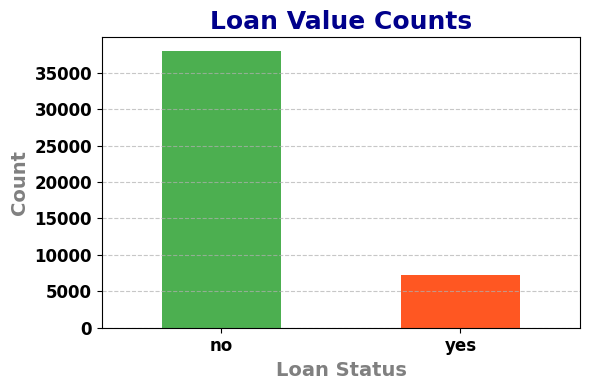

In [ ]:
import matplotlib.pyplot as plt

# Get the value counts for the 'loan' column
value_counts = df['loan'].value_counts()

# Plotting the bar chart with customized figure size and title
plt.figure(figsize=(6, 4))  # Adjust the size (width=6, height=4)

# Choose a new color scheme for the bars
value_counts.plot.bar(color=['#4CAF50', '#FF5722'])  # Green for 'yes' and Red for 'no'

# Customize plot elements
plt.title('Loan Value Counts', fontsize=18, fontweight='bold', color='darkblue')  # Title with bold font and color
plt.xlabel('Loan Status', fontsize=14, fontweight='bold', color='gray')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='gray')

# Adjust the appearance of ticks
plt.xticks(rotation=0, fontsize=12, fontweight='bold', color='black')  # Horizontal x-axis labels with bold font
plt.yticks(fontsize=12, fontweight='bold', color='black')  # y-axis ticks with bold font

# Add gridlines for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Tight layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()


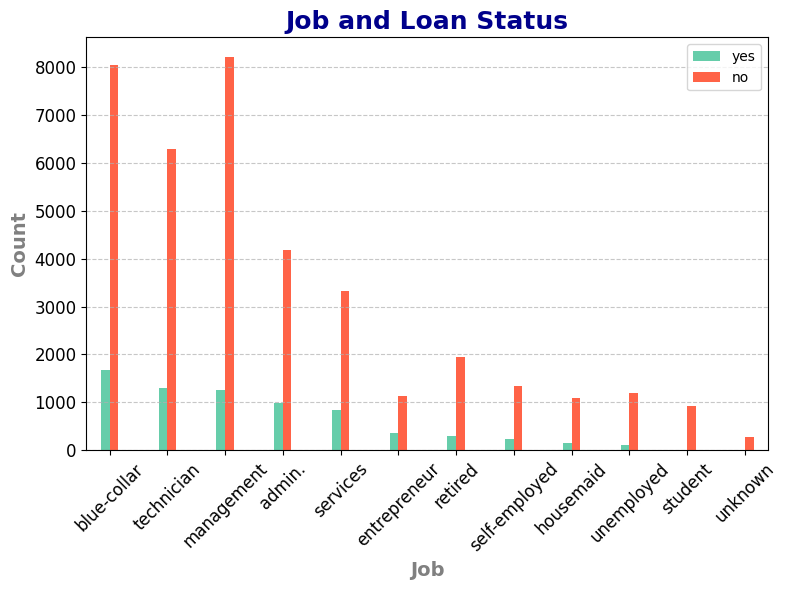

In [ ]:

# Create the DataFrame for job status counts based on loan status
j_df = pd.DataFrame()
j_df['yes'] = df[df['loan'] == 'yes']['job'].value_counts()
j_df['no'] = df[df['loan'] == 'no']['job'].value_counts()

# Set up the figure with a fixed size
fig, ax = plt.subplots(figsize=(8, 6))  # Adjusted figure size for better visualization

# Create the bar plot with a custom color palette (using a palette from Seaborn)
j_df.plot.bar(ax=ax, width=0.3, color=['#66CDAA', '#FF6347'])  # Teal for 'yes' and Tomato Red for 'no'

# Customize plot elements
ax.set_title('Job and Loan Status', fontsize=18, fontweight='bold', color='darkblue')  # Bold title with color
ax.set_xlabel('Job', fontsize=14, fontweight='bold', color='gray')  # Axis labels with bold and gray color
ax.set_ylabel('Count', fontsize=14, fontweight='bold', color='gray')  # Axis labels with bold and gray color

# Adjust tick parameters for readability
ax.tick_params(axis='x', labelrotation=45, labelsize=12, colors='black')  # Rotate x-axis labels with bold font
ax.tick_params(axis='y', labelsize=12, colors='black')  # Y-axis ticks with bold font

# Add gridlines for better readability
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Ensure tight layout
plt.tight_layout()

# Display the plot
plt.show()


# **Loan Preferences by Job Type (Job and Loan Status Chart)**

 ## **Insight:**

  * Most job categories, including blue-collar and technicians, have a higher   "no-loan" count compared to "yes-loan."


 * Specific job categories like students, housemaids, and unemployed individuals show very low interest or eligibility for loans.

 ## **Recommendation:**

 * Focus on job categories like technicians or management to promote tailored loan products.

* Explore alternative financial products or smaller loans for jobs with lower engagement (e.g., housemaids or students).

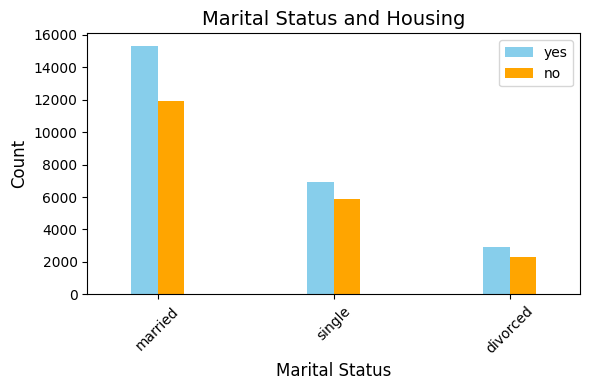

In [ ]:


# Create the DataFrame for marital status counts based on housing status
j_df = pd.DataFrame()

j_df['yes'] = df[df['housing'] == 'yes']['marital'].value_counts()
j_df['no'] = df[df['housing'] == 'no']['marital'].value_counts()

# Set up the figure with a fixed size
fig, ax = plt.subplots(figsize=(6, 4))  # Adjusted figure size

# Create the bar plot
j_df.plot.bar(ax=ax, width=0.3, color=['skyblue', 'orange'])

# Customize plot elements
ax.set_title('Marital Status and Housing', fontsize=14)
ax.set_xlabel('Marital Status', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.tick_params(axis='x', labelrotation=45, labelsize=10)

# Ensure tight layout
plt.tight_layout()

# Display the plot
plt.show()


# **Loan Status and Marital Status (Housing Loan Bar Chart)**

 ## **Insight:**

 * Married individuals are more likely to have housing loans compared to single or divorced individuals.

 * Single individuals show a significant portion who do not have housing loans.
 *Divorced customers are the least engaged in housing loans.

  ## **Recommendation:**

  * Offer housing loan plans tailored to singles, with flexible terms or co-signing options.

  * Provide refinancing or upselling opportunities for married customers.

  * Create targeted campaigns for divorced individuals with financial counseling or smaller loan products.

<ipython-input-228-6cb7bc7c5e14>:25: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



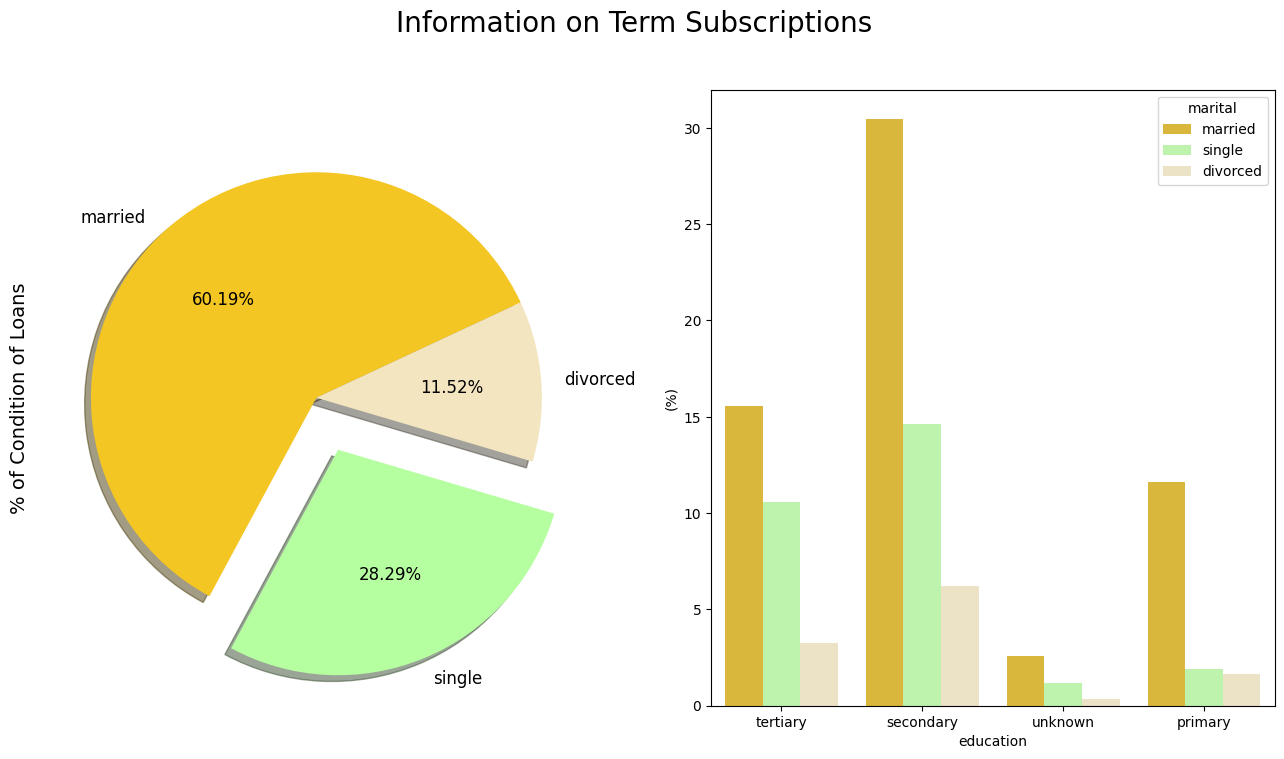

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(16, 8))

colors = ["#F3C623" ,"#B6FFA1", "#F2E5BF"]  # Added a third color for the third category
labels = "married", "single", "divorced"

plt.suptitle('Information on Term Subscriptions', fontsize=20)

df["marital"].value_counts().plot.pie(
    explode=[0, 0.25, 0],  # Added a third value to explode for the third category
    autopct='%1.2f%%',
    ax=ax[0],
    shadow=True,
    colors=colors,
    labels=labels,
    fontsize=12,
    startangle=25
)

ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

palette = ["#F3C623" ,"#B6FFA1", "#F2E5BF"]

sns.barplot(x="education", y="balance", hue="marital", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

 ### These insights are based on static characteristics like marital status, education, or occupation.

# **Marital Status (Pie Chart)**

  ### **Insight:**

 * Married individuals dominate the dataset (60.19%), followed by singles (28.29%) and divorced customers (11.52%).

## **Recommendation:**

 * Focus marketing strategies on married customers, as they form the largest group.
 * Create personalized plans to attract singles or divorced individuals to
  balance customer acquisition.


## **Education (Bar Chart)**


###  **Insight:**

 *Customers with secondary education make up the majority, followed by tertiary
  and primary education groups.

## **Recommendation:**

 * Develop financial literacy or product awareness campaigns targeting customers with secondary education, as they represent the largest audience for your services.

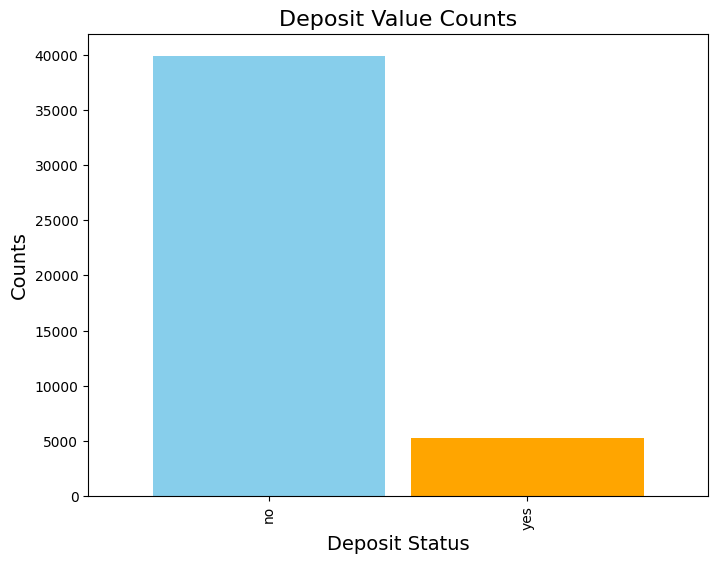

In [ ]:
value_counts = df['deposit'].value_counts()

# Create a larger figure with controlled bar size
plt.figure(figsize=(8, 6))  # Adjust width and height as needed
value_counts.plot.bar(title='Deposit Value Counts', width=0.9, color=['skyblue', 'orange'])
plt.title('Deposit Value Counts', fontsize=16)  # Increase title size
plt.xlabel('Deposit Status', fontsize=14)
plt.ylabel('Counts', fontsize=14)

plt.show()


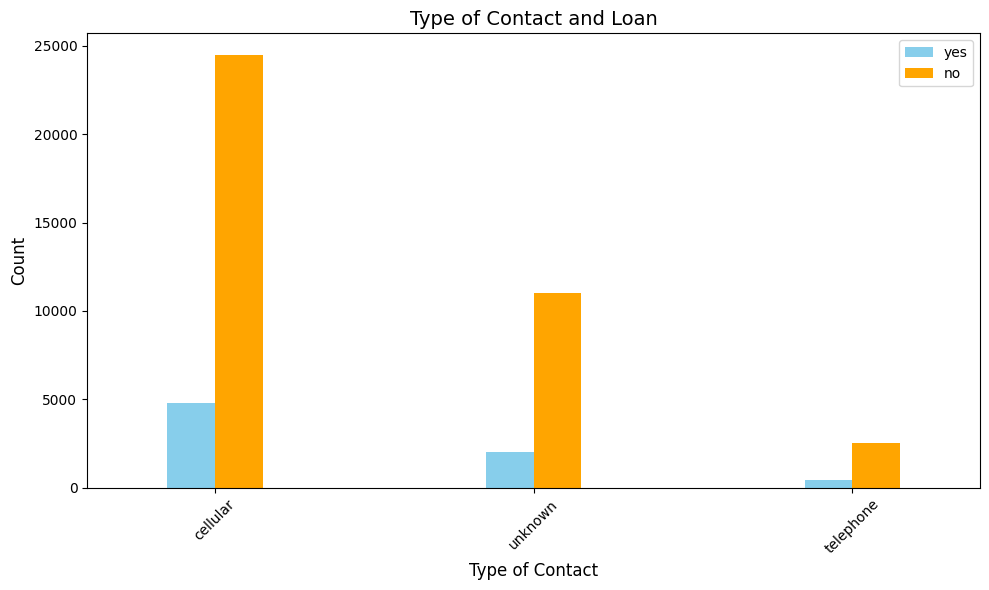

In [ ]:

# Prepare data
j_df = pd.DataFrame()
j_df['yes'] = df[df['loan'] == 'yes']['contact'].value_counts()
j_df['no'] = df[df['loan'] == 'no']['contact'].value_counts()

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 6))  # Fixed figure size

# Create the bar plot
j_df.plot.bar(ax=ax, width=0.3, color=['skyblue', 'orange'])

# Customize plot elements
ax.set_title('Type of Contact and Loan', fontsize=14)
ax.set_xlabel('Type of Contact', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.tick_params(axis='x', labelrotation=45, labelsize=10)

# Ensure layout is tight
plt.tight_layout()

# Display the plot
plt.show()


# **Type of Contact and Loan Status**

## **Insight:**

  * Cellular phones are the primary contact method, but most customers contacted
   this way have not taken a loan.

  * Telephone contacts and the "unknown" category show minimal engagement.

## **Recommendation:**

  * Optimize cellular communication strategies since this is the dominant c
  channel.

  *Investigate and refine the "unknown" category to improve contact accuracy  and engagement rates.
  
  *Identify demographic and behavioral traits of customers who agreed to loans and create personalized campaigns targeting similar profiles.

In [ ]:
# Distribution of Balances by Marital status
single = df['balance'].loc[df['marital'] == 'single'].values
married = df['balance'].loc[df['marital'] == 'married'].values
divorced = df['balance'].loc[df['marital'] == 'divorced'].values
plt.figure(figsize=(8,6))

single_dist = go.Histogram(
    x=single,
    histnorm='density',
    name='single',
    marker=dict(
        color='#6E6E6E'
    )
)


married_dist = go.Histogram(
    x=married,
    histnorm='density',
    name='married',
    marker=dict(
        color='#2E9AFE'
    )
)

divorced_dist = go.Histogram(
    x=divorced,
    histnorm='density',
    name='divorced',
    marker=dict(
        color='#FA5858'
    )
)


fig = tools.make_subplots(rows=3, print_grid=False)

fig.append_trace(single_dist, 1, 1)
fig.append_trace(married_dist, 2, 1)
fig.append_trace(divorced_dist, 3, 1)


fig['layout'].update(showlegend=False, title="Price Distributions by Marital Status",
                    height=1000, width=800)

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



<Figure size 800x600 with 0 Axes>

In [ ]:
df['marital/education'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['marital'] == 'single') & (df['education'] == 'primary'), 'marital/education'] = 'single/primary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'primary'), 'marital/education'] = 'married/primary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'primary'), 'marital/education'] = 'divorced/primary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'secondary'), 'marital/education'] = 'single/secondary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'secondary'), 'marital/education'] = 'married/secondary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'secondary'), 'marital/education'] = 'divorced/secondary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'tertiary'), 'marital/education'] = 'single/tertiary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'tertiary'), 'marital/education'] = 'married/tertiary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'tertiary'), 'marital/education'] = 'divorced/tertiary'


df.head()

<ipython-input-130-65149ccfb111>:5: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'single/primary' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,marital/education
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,married/tertiary
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,single/secondary
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,married/secondary
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,NaN
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,NaN


<ipython-input-186-9aad4be363e2>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Median Balance by Educational/Marital Group')

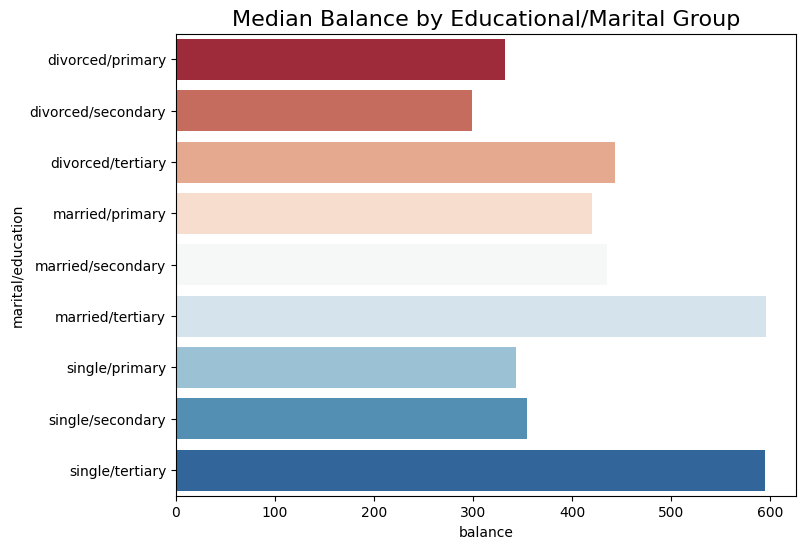

In [ ]:
education_groups = df.groupby(['marital/education'], as_index=False)['balance'].median()

fig = plt.figure(figsize=(8,6))




sns.barplot(x="balance", y="marital/education", data=education_groups,
            label="Total", palette="RdBu")

plt.title('Median Balance by Educational/Marital Group', fontsize=16)

# **Median Balance by Educational/Marital Group**

## **Insight:**


 * Single customers with tertiary education have the highest median balance.

 * Married individuals with secondary or tertiary education also have high
   median balances.

 * Divorced individuals with primary education have the lowest median balances.

## **Recommendation:**

 * Target Higher-Balance Groups: Focus marketing campaigns on individuals who are single or married with tertiary education, as they are more likely to have disposable income.

 * Engage Low-Balance Groups: Offer budget-friendly options or incentives for divorced individuals with primary education.

 #  **Insight**

**1. Major Loan Holders:**

 Blue Collar Workers, Technicians, and Management are the major holders of loans.


**2.Marital Status and Housing:**

Married Customers have a higher proportion of housing loans compared to Single
and Divorced individuals.


**3.Information on Term Subscriptions:**

60% of term subscriptions are bought by Married Customers.


**4.Education and Marital Status Effect on Term Subscriptions:**

Married customers with Secondary Education are more likely to accept term subscriptions compared to Single individuals or those with lower educational levels.


**5.Balance vs. Educational/Marital Status:**


Customers with Higher Education have the highest balances, followed by those with Secondary Education.

# **Model Building**

In [ ]:
x,y=new_df_1.iloc[:,0:16],y_1

In [ ]:
x.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure
24080,56,technician,married,secondary,no,589,yes,no,unknown,23,oct,518,1,147,2,success


In [ ]:
y.head(5)

,deposit
24060,0
24064,1
24072,0
24077,1
24080,1


In [ ]:
new_df_1.shape

(7764, 18)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_df_1.iloc[:,0:16],y_1, test_size=0.2, random_state=10)

In [ ]:
print(x_train.shape)
x_train.head()

(6211, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
43296,82,retired,divorced,primary,no,0,no,no,telephone,15,mar,506,2,195,1,other
39677,26,admin.,single,secondary,no,2509,no,no,cellular,27,may,776,3,97,3,success
34630,53,services,married,primary,no,171,yes,yes,cellular,5,may,343,4,167,6,other
37221,44,blue-collar,married,primary,no,186,yes,no,cellular,13,may,152,1,370,1,failure
37975,27,technician,single,secondary,no,218,yes,no,cellular,14,may,1462,2,352,1,failure


In [ ]:
print(x_test.shape)
x_test.head()

(1553, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
32158,38,technician,single,secondary,no,8381,no,no,cellular,15,apr,82,1,145,1,failure
24917,42,blue-collar,married,primary,no,2273,yes,no,cellular,18,nov,253,1,112,2,failure
29457,50,technician,married,tertiary,no,199,yes,yes,cellular,3,feb,116,2,253,1,failure
26617,58,retired,married,tertiary,no,5087,no,no,cellular,20,nov,63,2,154,1,failure
24911,36,technician,married,secondary,no,1345,yes,no,cellular,18,nov,82,1,172,3,failure


In [ ]:
print(y_train.shape)
y_train.head()

(6211, 1)


,deposit
43296,1
39677,1
34630,0
37221,0
37975,0


In [ ]:
print(y_test.shape)
y_test.head()

(1553, 1)


,deposit
32158,0
24917,0
29457,0
26617,0
24911,0


In [ ]:
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(transformers=[
    ('tnf1',StandardScaler(), ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']),
                                                                                  # Apply StandardScaler to numerical columns
    ('thf2',OneHotEncoder(sparse_output=False,drop='first'),['job','marital', 'education', 'contact', 'month', 'poutcome'])                                                      # Apply OneHotEncoder to categorical columns
  ],remainder = 'passthrough' )

In [ ]:
transformer.fit_transform(x_train).shape

(6211, 41)

In [ ]:
transformer.fit_transform(x_test).shape

(1553, 41)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder # Import OrdinalEncoder instead of LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

# Define preprocessing steps
transformer = ColumnTransformer(
    transformers=[
        ('tnf1', StandardScaler(), ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']),
        ('thf2', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['job', 'marital', 'education', 'contact', 'month', 'poutcome']),
        # Use OrdinalEncoder for binary features instead of LabelEncoder
        ('tnf3', OrdinalEncoder(), ['default', 'housing', 'loan'])
    ],
    remainder='passthrough'
)

# Create a pipeline with preprocessing and model
decision_tree = Pipeline(steps=[('preprocessor', transformer),
                                 ('regressor', DecisionTreeRegressor())])

# Assuming x_train and y_train are already defined
decision_tree.fit(x_train, y_train)

Y_pred = decision_tree.predict(x_test)

acc_decision_tree =round(accuracy_score(y_test,Y_pred) *100 , 2)
print(f"Accuracy of Decision Tree model : {acc_decision_tree} %. ")


Accuracy of Decision Tree model : 77.85 %. 


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Example: If x_train is a pandas DataFrame
if isinstance(x_train, pd.DataFrame):
    x_train = pd.get_dummies(x_train, drop_first=True)
else:
    # If it's a NumPy array, consider using LabelEncoder or OneHotEncoder
    encoder = LabelEncoder()
    x_train = x_train.apply(lambda col: encoder.fit_transform(col) if col.dtypes == 'object' else col)


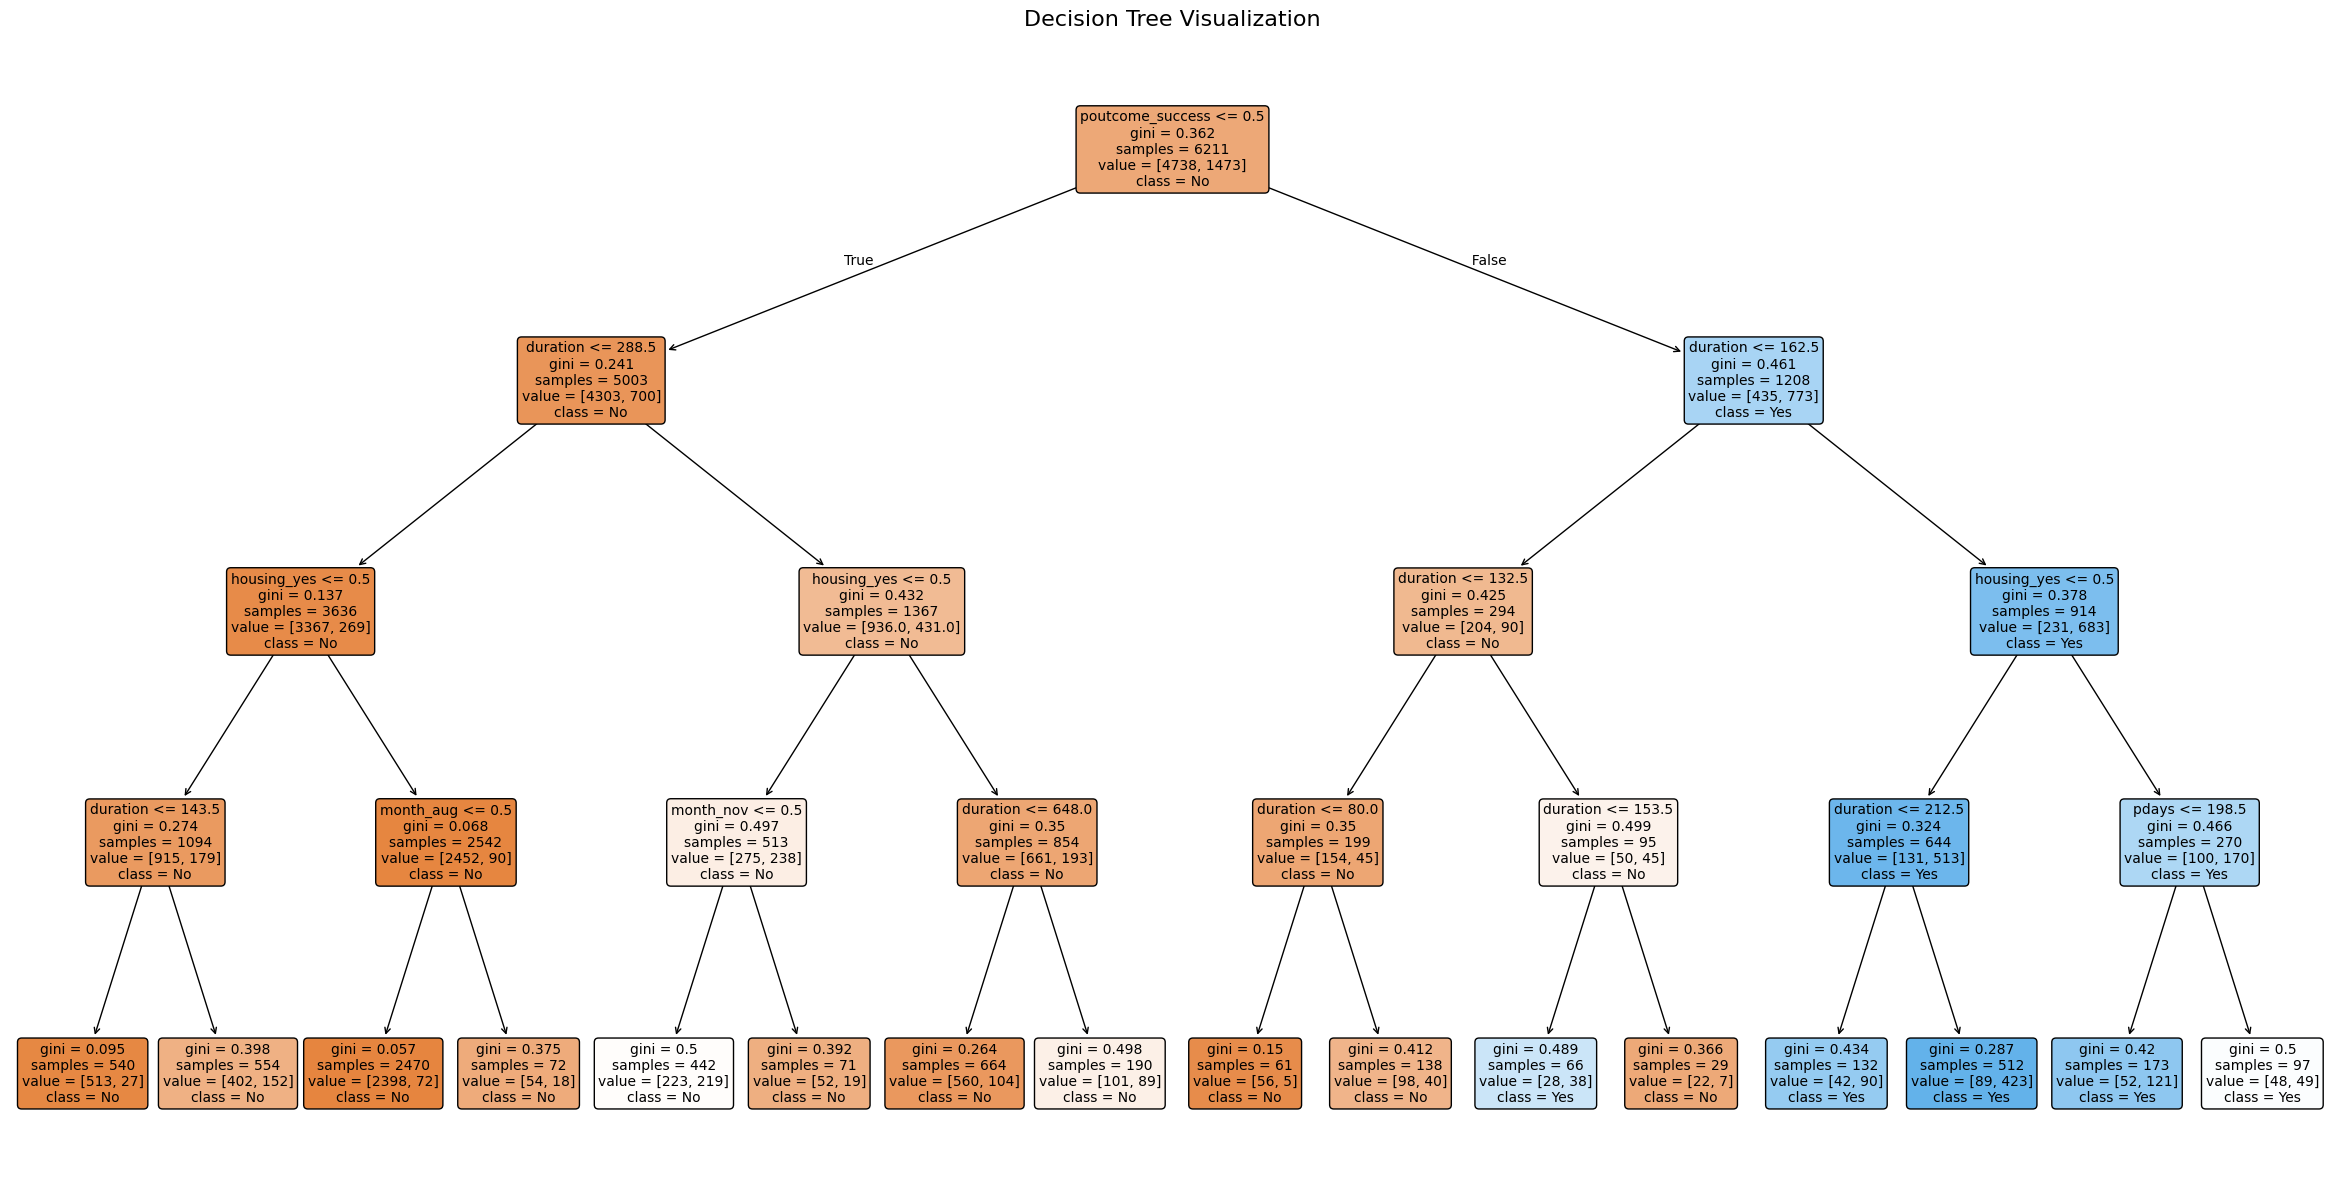

In [ ]:
# Create and fit the Decision Tree Classifier
clas = tree.DecisionTreeClassifier(max_depth=4, random_state=0)
clas.fit(x_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(30, 15))  # Set the figure size
tree.plot_tree(
    clas,
    feature_names=x_train.columns,  # Column names as feature names
    class_names=["No", "Yes"],  # Target class names
    filled=True,  # Fill colors to indicate decision
    rounded=True,  # Rounded nodes for better visuals
    fontsize=10  # Font size for better readability
)

plt.title("Decision Tree Visualization", fontsize=16)
plt.show()


# **Overall Strategy**

### **Combine Demographic and Behavioral Data:**

 * Use demographic data (e.g., marital status, education) alongside behavioral data (e.g., contact preferences, loan status) to refine targeting.


### **Predictive Modeling:**

 * Develop a machine learning model to predict loan or product purchase likelihood based on demographic and behavioral factors.

### **A/B Testing:**

 * Experiment with personalized messages and offers tailored to different demographic groups to measure effectiveness.